# **Summary of Process**

So far, I have explored the dataset to understand what factors influence customer satisfaction in the restaurant. The goal is to predict whether a customer is highly satisfied using features such as wait time, service rating, food rating, ambiance rating, average spend, visit frequency, loyalty program membership, online reservations, delivery orders, group size, and time of visit.

The first step was data cleaning and preparation. I confirmed that there were no missing or duplicate values, converted numeric columns to proper data types, and encoded categorical variables as ordinal or binary values so they could be used in classification models. Columns that were not relevant to the research question, such as CustomerID, Gender, and PreferredCuisine, were removed.

Next, I conducted exploratory data analysis (EDA) to understand patterns in the data. This included plotting distributions for numeric variables, counting categorical values, and computing correlations. From these analyses, I observed that individual features like service rating or food rating have weak correlations with overall satisfaction. This suggested that more sophisticated models would be necessary to capture hidden patterns and interactions among features. I also identified the minority class of highly satisfied customers, which makes up only about 13% of the dataset, highlighting a potential class imbalance issue.

# **Research Question**

My research question is How can a restaurant chain use machine learning models to predict customer satisfaction and identify which operational areas (wait times, food quality, or service interactions) most influence satisfaction in order to guide resource allocation?

This is a supervised classification problem, where the goal is to predict a binary outcome (HighSatisfaction: 0 = not highly satisfied, 1 = highly satisfied) from a set of input features. The predictor variables include wait time, service rating, food rating, ambiance rating, average spend, visit frequency, loyalty program membership, online reservations, delivery orders, group size, and time of visit. The response variable is the customer’s satisfaction level.

Framing the question this way allows the use of machine learning models like Random Forest and XGBoost to make predictions, rank feature importance, and provide actionable insights for restaurant managers.

# **Analysis Approach**

Feature Engineering:
For this milestone, numeric features were left as-is, and categorical features were encoded as ordinal or binary values. No additional transformations were needed because tree-based models can handle different scales and data types. In future work, I may address the class imbalance using techniques like class weighting or oversampling.

Modeling:
I trained Random Forest and XGBoost classifiers on the dataset. These tree-based models were chosen because they can capture complex interactions between features, handle both numeric and categorical data, and provide feature importance metrics.

Performance Evaluation:



The models were evaluated using multiple metrics:
*   Accuracy, precision, recall, and F1-score
*   Bar graphs for true/false positives and negatives
*   ROC curves and AUC scores


I also reviewed misclassified examples to understand model limitations and which customer profiles were more difficult to predict.

# **Model Training and preliminary results**

---



In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,roc_curve, auc, confusion_matrix


In [16]:
#Load Cleaned dataset
df = pd.read_csv('../data/clean/cleaned_restaurant_data.csv')
df.head()

,WaitTime,ServiceRating,FoodRating,AmbianceRating,AverageSpend,VisitFrequency,LoyaltyProgramMember,OnlineReservation,DeliveryOrder,GroupSize,TimeOfVisit,HighSatisfaction
0,43.523929,2,5,4,27.829142,3,1,0,1,3,1,0
1,57.524294,5,5,3,115.408622,1,0,0,0,1,3,0
2,48.682623,3,4,5,106.693771,3,0,0,1,6,3,0
3,7.552993,4,5,1,43.508508,1,0,0,0,1,2,0
4,37.789041,2,3,5,148.084627,4,1,0,0,1,1,0


In [17]:
#Split into X and y
X = df.drop(columns= ['HighSatisfaction'])
y = df['HighSatisfaction']

#80/20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Combine to save into train and test files
train_split = X_train.copy()
train_split['HighSatisfaction'] = y_train

test_split = X_test.copy()
test_split['HighSatisfaction'] = y_test
train_split

#Saving Both files to a csv
train_split.to_csv('../data/clean/train_split.csv', index=False)
test_split.to_csv('../data/clean/test_split.csv', index=False)

print(f"Training set: {train_split.shape}, Validation set: {test_split.shape}")

Training set: (1200, 12), Validation set: (300, 12)


In [18]:
#Load training data to use in prelim results
train_df = pd.read_csv('../data/clean/train_split.csv')

# Split into X and y
X = train_df.drop(columns=['HighSatisfaction'])
y = train_df['HighSatisfaction']

# 80/20 split for preliminary training/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [19]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on validation set
rf_pred = rf_model.predict(X_val)
xgb_pred = xgb_model.predict(X_val)

# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_val, rf_pred))
print ("Random Forest Classification Report:\n", classification_report(y_val, rf_pred))
print("XGBoost Accuracy:", accuracy_score(y_val, xgb_pred))
print("XGBoost Classification Report:\n", classification_report(y_val, xgb_pred))



Random Forest Accuracy: 0.8791666666666667
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       208
           1       0.80      0.12      0.22        32

    accuracy                           0.88       240
   macro avg       0.84      0.56      0.58       240
weighted avg       0.87      0.88      0.84       240

XGBoost Accuracy: 0.8708333333333333
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       208
           1       0.52      0.38      0.44        32

    accuracy                           0.87       240
   macro avg       0.71      0.66      0.68       240
weighted avg       0.86      0.87      0.86       240



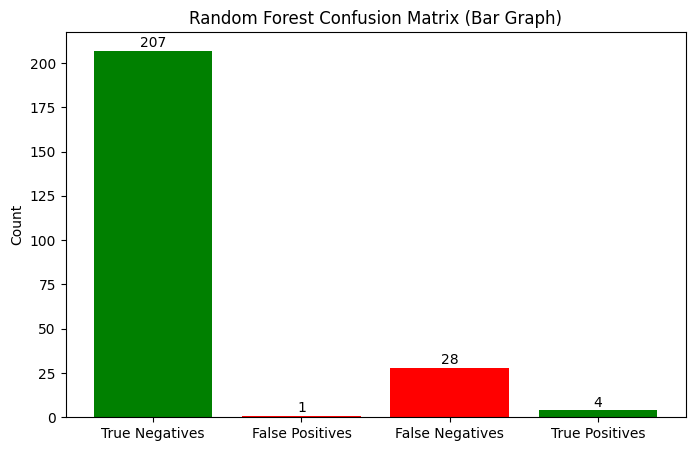

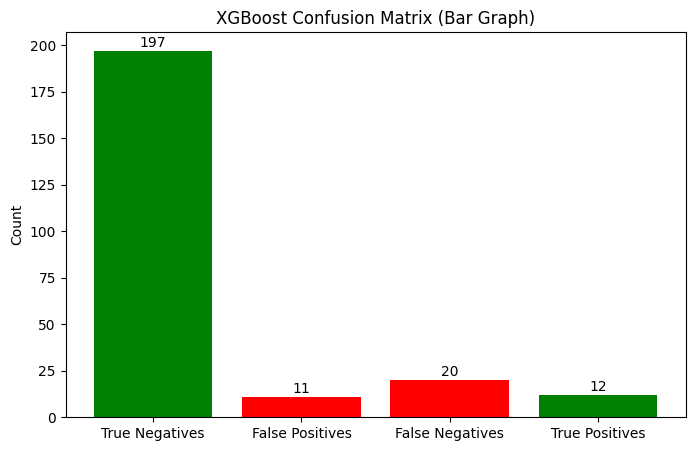

In [20]:
#True Positives and Negatives/ False Positives and negatives bar graph
def confusion_bar(y_true, y_pred, title):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    categories = ['True Negatives', 'False Positives', 'False Negatives', 'True Positives']
    values = [tn, fp, fn, tp]

    plt.figure(figsize=(8,5))
    bars = plt.bar(categories, values, color=['green','red','red','green'])
    plt.title(title)
    plt.ylabel('Count')

    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, str(values[i]), ha='center')
    plt.show()

confusion_bar(y_val, rf_pred, "Random Forest Confusion Matrix (Bar Graph)")
confusion_bar(y_val, xgb_pred, "XGBoost Confusion Matrix (Bar Graph)")

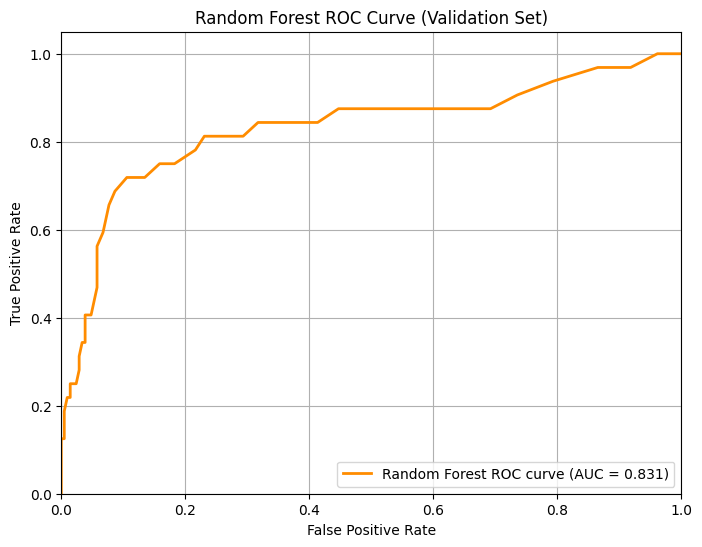

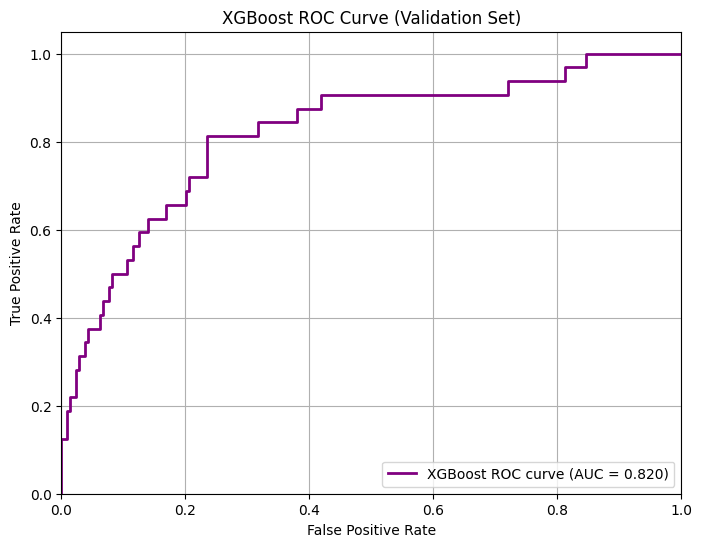

In [21]:
#ROC Curve
def plot_roc_curve(y_true, y_prob, model_name):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} ROC curve (AUC = {roc_auc:.3f})', color='darkorange' if model_name=="Random Forest" else 'purple')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve (Validation Set)')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# --- Call the function for both models ---
rf_prob = rf_model.predict_proba(X_val)[:, 1]
xgb_prob = xgb_model.predict_proba(X_val)[:, 1]

plot_roc_curve(y_val, rf_prob, "Random Forest")
plot_roc_curve(y_val, xgb_prob, "XGBoost")


In [22]:
# Misclassification Review
misclassified = X_val[y_val != rf_pred]
print("Sample Misclassified Records (Random Forest):")
misclassified.head()

Sample Misclassified Records (Random Forest):


,WaitTime,ServiceRating,FoodRating,AmbianceRating,AverageSpend,VisitFrequency,LoyaltyProgramMember,OnlineReservation,DeliveryOrder,GroupSize,TimeOfVisit
1037,12.699771,4,3,4,57.251289,4,0,0,0,1,2
1128,13.332046,1,2,3,74.409390,2,1,0,1,4,1
1069,4.453892,3,5,1,122.989553,3,0,0,0,9,1
127,12.221203,5,5,1,189.622239,4,1,1,1,5,3
1002,28.045760,5,5,4,107.999124,3,1,0,0,9,1


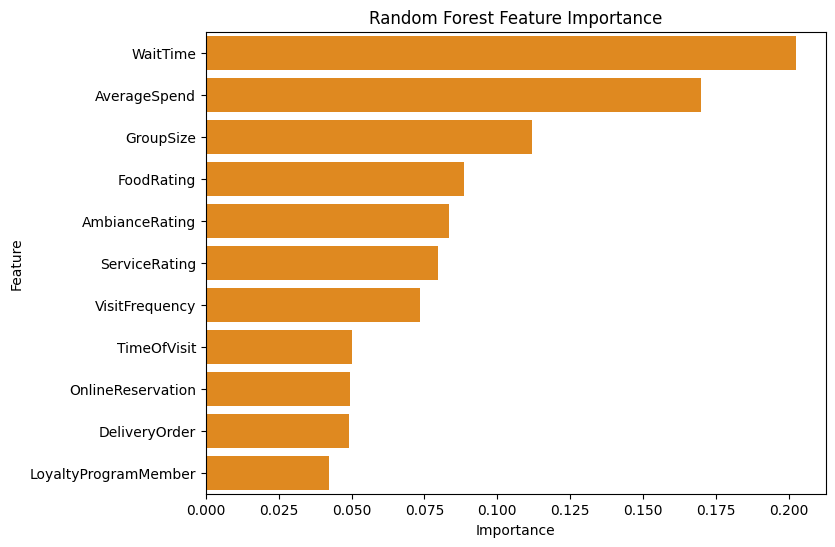

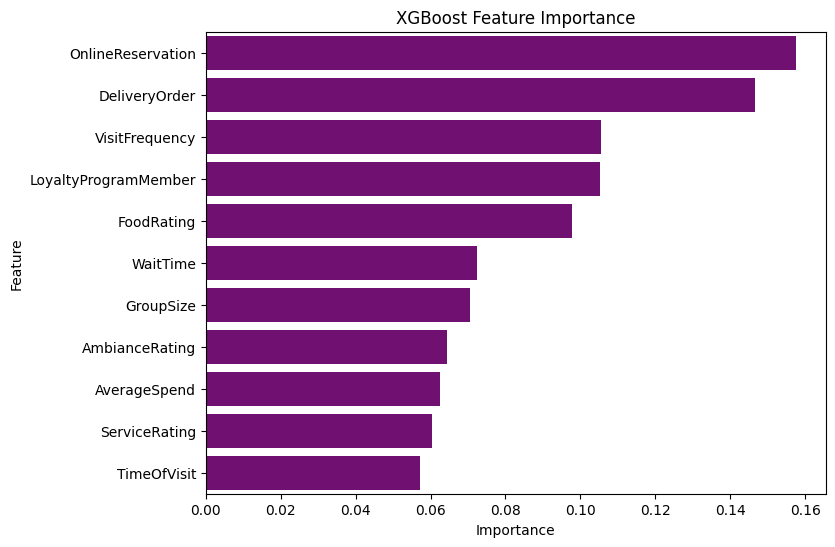

In [23]:
#Feauture Importance
def plot_feature_importance(model, X, model_name):
    importances = model.feature_importances_
    feature_names = X.columns

    feat_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)


    color = 'darkorange' if model_name.lower() == 'random forest' else 'purple'


    plt.figure(figsize=(8,6))
    sns.barplot(x='Importance', y='Feature', data=feat_df, color=color)
    plt.title(f'{model_name} Feature Importance')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Random Forest
plot_feature_importance(rf_model, X_train, "Random Forest")

# XGBoost
plot_feature_importance(xgb_model, X_train, "XGBoost")

# **Preliminary Results**

Random Forest:

* Accuracy: 0.879

* ROC-AUC: 0.831

* Confusion Matrix: TN=207, FP=1, FN=28, TP=4

The Random Forest model performs well at identifying the majority class (customers who are not highly satisfied) but struggles with the minority class (highly satisfied customers). Feature importance analysis shows that WaitTime (0.20), AverageSpend (0.175), and GroupSize (0.125) are the most influential factors. Other moderately important features include FoodRating (0.10), AmbianceRating (~0.075–0.10), and ServiceRating (~0.075), while VisitFrequency, TimeOfVisit, OnlineReservation, DeliveryOrder, and LoyaltyProgramMember contribute less (around 0.05 or lower). This indicates that operational factors related to customer experience, spending, and group dynamics play a stronger role in predicting satisfaction than secondary features like online reservations or loyalty membership.

XGBoost:

* Accuracy: 0.871

* ROC-AUC: 0.820

* Confusion Matrix: TN=197, FP=11, FN=20, TP=12

XGBoost performs slightly better at identifying highly satisfied customers while maintaining reasonable overall accuracy. Feature importance highlights OnlineReservation (0.16), DeliveryOrder (0.15), and VisitFrequency (0.13) as top predictors. FoodRating (0.10), WaitTime (0.08), GroupSize (0.07), AmbianceRating (0.07), AverageSpend (0.07), ServiceRating (0.06), and TimeOfVisit (0.057) are moderately important, while LoyaltyProgramMember is the least influential. This suggests XGBoost captures some patterns that emphasize customer behavior and engagement (online reservations and delivery) in addition to operational quality factors.

Visualizations:

* Bar plots of TP, TN, FP, and FN for each model

* ROC curves to visualize the trade-off between true positive rate and false positive rate

* Feature importance plots to show which operational and behavioral factors contribute most to satisfaction

* Sample misclassified records to review patterns of errors

# **Looking Forward: Final Analysis and Potential Obstacles**

In the next phase, the plan is to:

1. Handle the class imbalance using methods like oversampling or adjusting class
weights.

2. Tune the Random Forest and XGBoost models using GridSearchCV or RandomizedSearchCV.

3. Test the models on a separate set of data to see how well they would perform in real situations.

4. Keep reviewing misclassifications and feature importance to give clear, actionable guidance for restaurant managers.

Some challenges we may face include the small size of the dataset and the relatively weak relationship between individual features and overall satisfaction.